## Exercise 4.8 Building your own digit recognition model

Now, you are going to apply your knowledge to a new model and different dataset.

This is the MNIST dataset, which contains images of handwritten digits. Each image is composed of a 28 pixel by 28 pixel grid, each pixel in an image has gray-scale value. So, 0 would be as light as possible, and 255 is as dark as possible.

For each image, the 28 x 28 grid has been flattened into a 784 x 1 array, showing a digit like 0, 1, 2, 3 4, all the way up to 9. You can download the dataset from the following link:

[mnist.csv](https://drive.google.com/file/d/1Z2N5ad_hsdguG64ta76O8iTKiBnPwxZK/view?usp=sharing)

You will create a deep learning model taking in those 784 features for each image as inputs, and predicting digits from among 10 possible values for the output.

The data is pre-loaded into a pandas DataFrame called `df`. The dataframe has 2000 rows, we will divide `df` into two parts. The first 1900 rows are used to create the `predictors` for training the model. Other 100 rows are used to create the `pred_data` for making predictions with the model.

The `predictors`, `target`, and `pred_data` arrays are also pre-defined.

We also define an utility function named `showImg()` to show images from the dataset with the corresponding labels.


## Instructions

* Create a model that has two hidden layers of `50` units. The input_shape for this dataset is `(784,)`. The activation function of the hidden layers are `'relu'`.
* The output layer should use `'softmax'` activation function, and the number of nodes in this layer should be the same as the number of possible outputs, in this case: `10`.
* Compile model as you have done with previous exercise: Using `'adam'` as the optimizer, `'categorical_crossentropy'` for the loss, and `metrics=['accuracy']`.
* Fit the model using `predictors` and `target`, using a `validation_split` of `0.3`. The number of epochs is `20`, using early stopping with `patience=5`.
* After finish fitting the model, you should save the model with `model.save()` function.
* Load the saved model with `load_model()` function, then use the loaded model to predict on `pred_data`.

## Code

Load data and convert the data to NumPy array:

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Load csv file into the dataframe: df
df = pd.read_csv("mnist.csv")

# The dataframe df has 2000 rows, we will divide df into two parts
# The first 1900 rows are used to create the predictors for training the model
# Other 100 rows are used to create the pred_data for making predictions with the model
trainDF = df.iloc[:1900,:]
predictDF = df.iloc[1900:,:]
print(f"The shape of: df = {df.shape}, trainDF = {trainDF.shape}, predictDF = {predictDF.shape}")

# Create predictors NumPy array: predictors
predictors = trainDF.drop(['5'], axis=1).values

# Create list of image labels
label = trainDF['5'].values

# Convert the target to categorical: target
target = to_categorical(trainDF['5'])

# Create data for predictions NumPy array: pred_data
pred_data = predictDF.drop(['5'], axis=1).values

print(f"The shape of: predictors = {predictors.shape}, target = {target.shape}, pred_data = {pred_data.shape}")

# Define the input shape: input_shape
n_cols = predictors.shape[1]
input_shape = (n_cols,)


The shape of: df = (2000, 785), trainDF = (1900, 785), predictDF = (100, 785)
The shape of: predictors = (1900, 784), target = (1900, 10), pred_data = (100, 784)


Define utility functions

<Figure size 640x480 with 0 Axes>

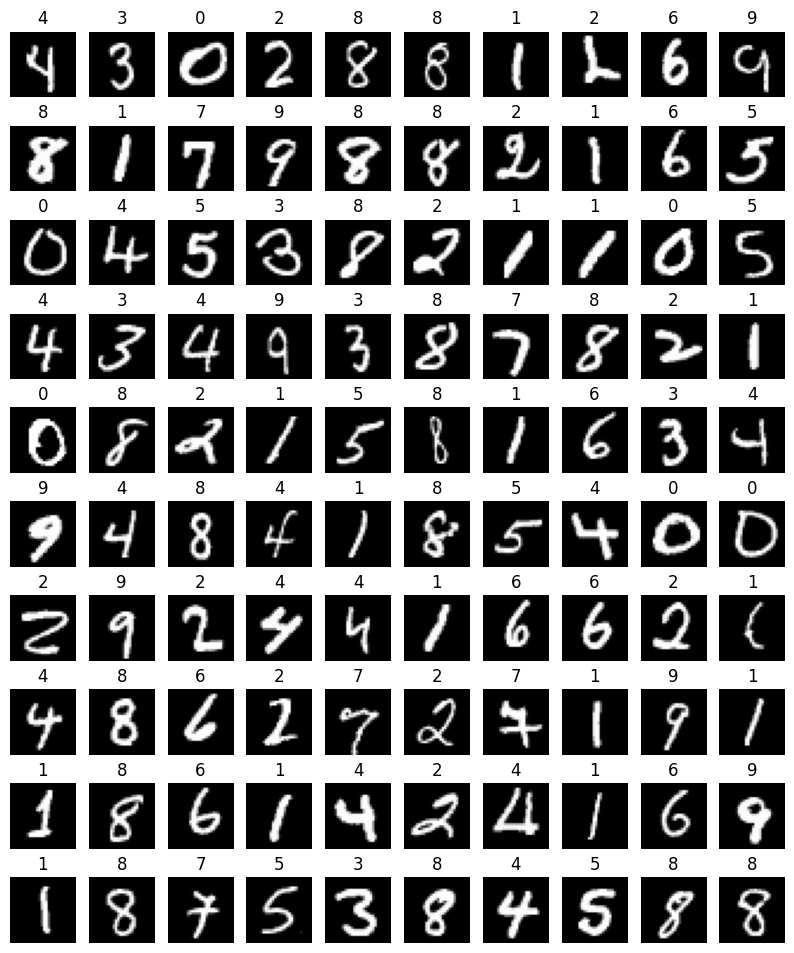

In [32]:
import matplotlib.pyplot as plt
plt.gray()

# Function showImage display images in a grid of nRow x nColumn
# Image data comes from the data array, starting from startIndex
# label array contains the corresponding lable of the image
def showImage(nRow, nColumn, startIndex, data, label):
#  imgData =[]
  # create figure
  fig = plt.figure(figsize=(nColumn, nRow*1.2))

  # reading images
  for i in range(0, nRow*nColumn):
    row = data[startIndex + i]
    title = label[startIndex + i]
    imgData = row.reshape([28,28])

    # Adds a subplot at the i+1 position
    fig.add_subplot(nRow, nColumn, i+1)
    plt.imshow(imgData)
    plt.axis('off')
    plt.title(title)

  plt.show()

# Show 100 images in the predictors array, starting from #0
showImage(10, 10, 0, predictors, label)


Create a neural network for the classification task

In [41]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define a function to create model:
def get_new_model(input_shape):
  # Set up the model
  model = Sequential()
  model.add(Dense(50, activation='relu', input_shape=input_shape))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model


def get_new_model_new(input_shape):
  # Set up the model
  model = Sequential()
  model.add(Dense(100, activation='relu', input_shape=input_shape))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

Compile and fit the model with a validation dataset:

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2461 - loss: 38.9967 - val_accuracy: 0.5719 - val_loss: 7.0280
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6489 - loss: 4.6545 - val_accuracy: 0.6263 - val_loss: 5.0217
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7817 - loss: 2.1315 - val_accuracy: 0.7070 - val_loss: 3.7416
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8526 - loss: 1.0923 - val_accuracy: 0.7070 - val_loss: 3.4668
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8685 - loss: 0.8865 - val_accuracy: 0.7281 - val_loss: 3.0978
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9119 - loss: 0.4776 - val_accuracy: 0.7140 - val_loss: 2.9995
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9408 - loss: 0.2433 - val_accuracy: 0.7491 - val_loss: 2.7172
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9608 - loss: 0.1741 - val_accuracy: 0.7351 - val_los

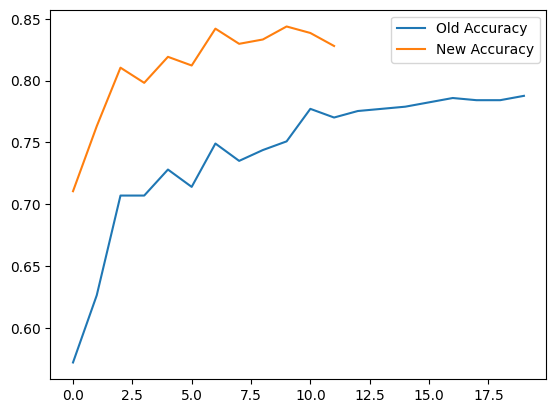

In [44]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=5)

# Specify, compile and fit the model
model = get_new_model(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_training = model.fit(predictors, target, epochs=20, validation_split=0.3, callbacks=[early_stopping_monitor])

print('-----\n\n-----')

model_new = get_new_model_new(input_shape)
model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_new_training = model_new.fit(predictors, target, epochs=20, validation_split=0.3, callbacks=[early_stopping_monitor])

val_acc = model_training.history['val_accuracy']
val_acc_new = model_new_training.history['val_accuracy']
plt.plot(val_acc, label='Old Val_Accuracy')
plt.plot(val_acc_new, label='New Val_Accuracy')
plt.legend()
plt.show()

#By increasing the number of units within each layer, along with adding an additional layer, the new model was able to perform with much better validate accuracy.


# Save the model - creates a zip archive myModel.keras.
model.save('myModel.keras')

Load the saved model and make predictions on the `pred_data`

In [10]:
# Import load_model
from tensorflow.keras.models import load_model

myModel = load_model('myModel.keras')
predictions = myModel.predict(pred_data)
prediction_classes = np.argmax(predictions,axis=1)
print(prediction_classes)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[8 3 8 4 5 7 0 4 1 8 8 0 4 3 3 7 1 0 6 0 2 6 4 4 4 0 1 7 1 9 4 2 7 0 1 6 0
 9 7 0 7 1 1 4 9 5 8 1 4 8 8 6 3 2 6 5 1 6 5 6 4 7 7 2 0 7 5 8 8 5 4 4 1 3
 7 9 7 3 4 7 8 1 5 0 0 7 4 1 2 9 4 9 0 0 9 8 2 8 9 7]


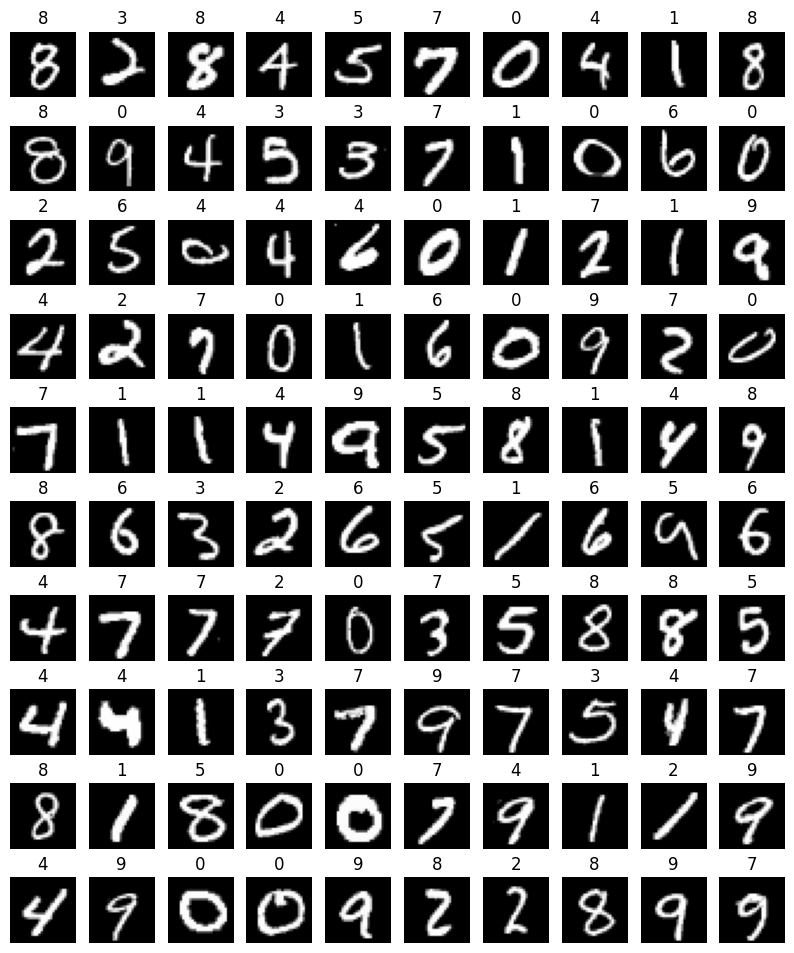

In [11]:
# Show 100 images in the pred_data array with prediction result, starting from #0
showImage(10, 10, 0, pred_data, prediction_classes)

# Question
The current model has the `val_accuracy` around `0.77`. Please improve the model to get the `val_accuracy` more than `0.8`.
Use the new model to predict on the `pred_data` and compare the results.